In [27]:
# WPV Data EDA Notebook - For Lily

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Set plot style
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("../../cleaned_data/lily/merged_wpv_cleaned.csv")

In [29]:
# ========== Overview ==========
print("\n✅ Dataset Shape:", df.shape)
print("\n✅ Column Preview:")
print(df.columns.tolist())
print("\n✅ Sample Rows:")
print(df.head())


✅ Dataset Shape: (551, 47)

✅ Column Preview:
['event_time', 'incident_id', 'Facility Type', 'victim_profession', 'department', 'perpetrator_type', 'violence_type', 'assault_desc', 'Assault Description', 'contributing_factors', 'severity', 'emotional_impact', 'physical_injury_level', 'response_action', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'source', 'victim_primary_job', 'severity_level', 'Unnamed: 11', 'Unnamed: 0', 'File ID', 'Event Date', 'Severity Level (Actual)', 'Injury Incurred? (any pain, bruise/abrasion, first aid, harm/intervention)', 'Type of Person Affected', 'ID/Badge #', 'Job Classification at Time of Event', 'Specific Event Type', 'Type of Abuse/Assault', 'Immediate Actions (Reported)', 'Contributing Factors (Reported)', 'Date Filed with Law Enforcement', 'Nature of Injury', 'Location of Injury on Body', 'Emotional and/or Psychological Impact', 'Brief Factual Description', 'Care/Service Area', 'Department', 'Suggestion(s) for avoiding similar Event in future', 'T

In [30]:
# ========== Missing Values ==========
print("\n📌 Missing Value Count:")
print(df.isnull().sum())


📌 Missing Value Count:
event_time                                                                    306
incident_id                                                                   476
Facility Type                                                                 302
victim_profession                                                             296
department                                                                    476
perpetrator_type                                                              303
violence_type                                                                 303
assault_desc                                                                  291
Assault Description                                                           479
contributing_factors                                                          289
severity                                                                      441
emotional_impact                                                          

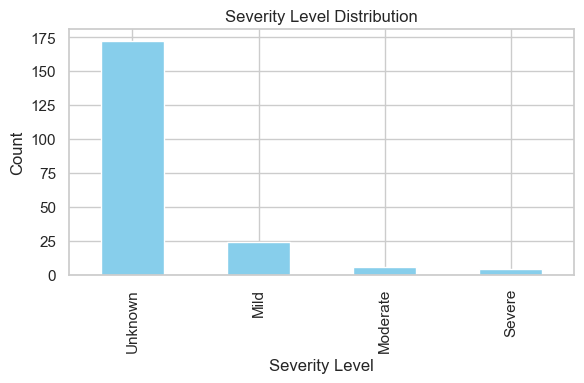

In [31]:
# ========== Severity Distribution ==========
plt.figure(figsize=(6,4))
df['severity_level'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Severity Level Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

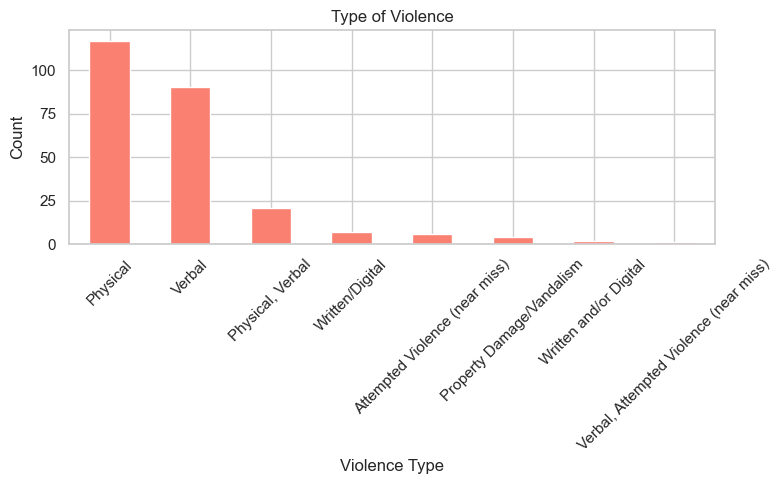

In [32]:
# ========== Violence Type ==========
plt.figure(figsize=(8,5))
df['violence_type'].value_counts().plot(kind='bar', color='salmon')
plt.title("Type of Violence")
plt.xlabel("Violence Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

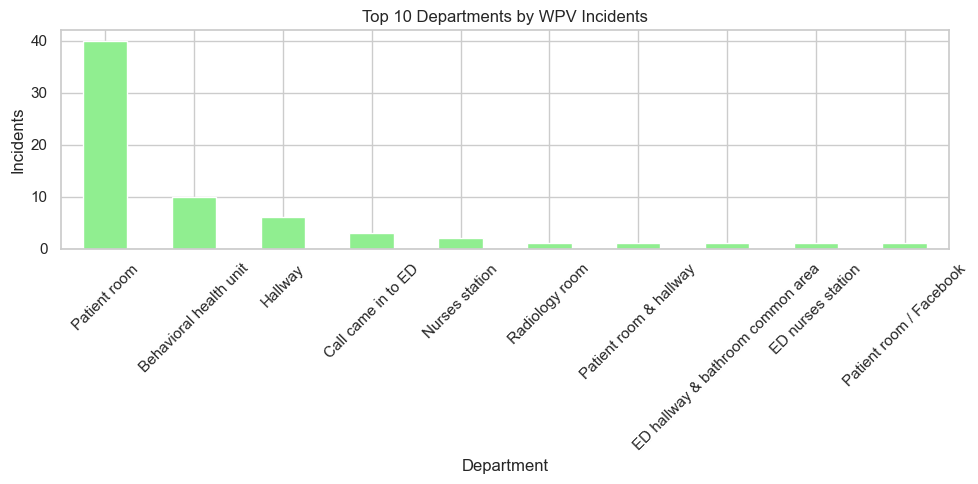

In [33]:
# ========== Department Distribution ==========
plt.figure(figsize=(10,5))
df['department'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title("Top 10 Departments by WPV Incidents")
plt.xlabel("Department")
plt.ylabel("Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

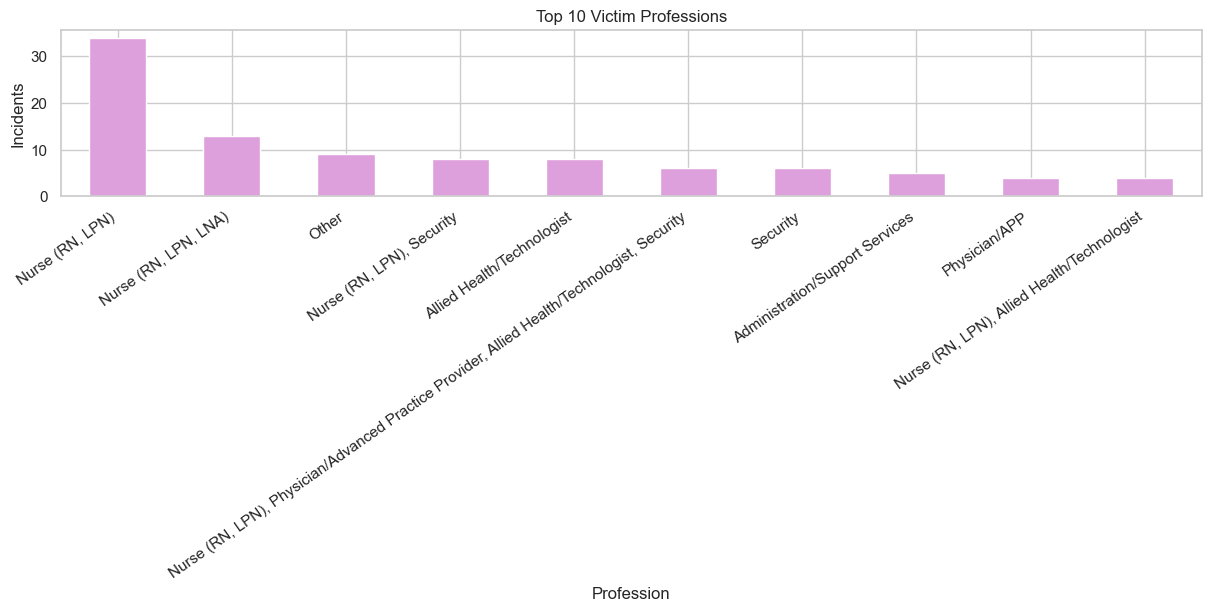

In [34]:
# ========== Victim Profession ==========
# Replace "<N/S>" string with actual NaN
df['victim_profession'] = df['victim_profession'].replace('<N/S>', np.nan)

# Drop missing values from victim_profession
df_victim_prof = df[df['victim_profession'].notna()]


# Plot top 10 victim professions - improved spacing
plt.figure(figsize=(12,6), constrained_layout=True)
df_victim_prof['victim_profession'].value_counts().head(10).plot(kind='bar', color='plum')

plt.title("Top 10 Victim Professions")
plt.xlabel("Profession")
plt.ylabel("Incidents")
plt.xticks(rotation=35, ha='right') 

plt.show()

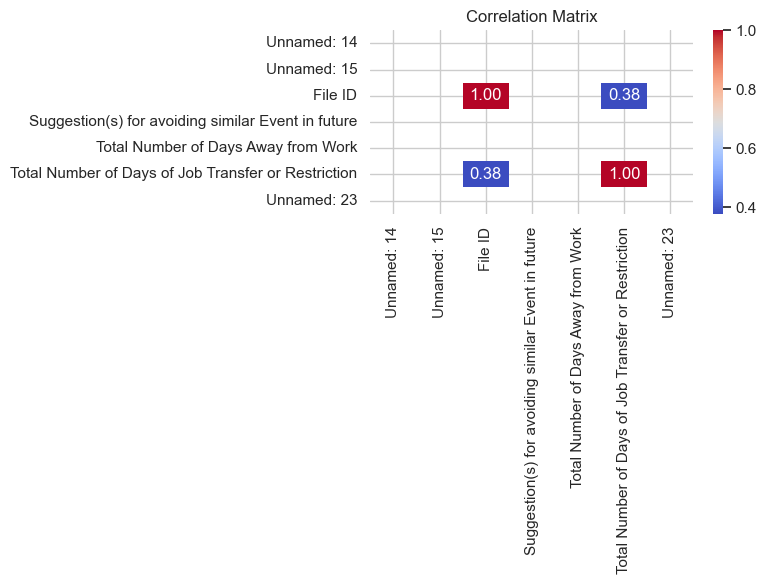

In [35]:
# ========== Correlation Matrix (if numeric) ==========
numeric_cols = df.select_dtypes(include=['number'])
if not numeric_cols.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to display correlation.")